<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/ADP/Chapter5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1. 머신러닝의 의미

머신러닝은 데이터의 훈련 샘플들을 학습해 데이터의 규칙과 패턴을 학습하여 결과를 예측하는 알고리즘과 시스템을 연구하는 분야이다.


# Section 2. 머신러닝 분석 프로세스 설명

1. 데이터 확인
  
  - 독립변수, 종속변수 유무 확인 (종속 없으면 비지도)
  - 연속형 vs 범주형 확인 (범주형 경우 분할 전 원핫인코딩 or 라벨인코딩)
  - 적용 가능한 분석모델 확인 (회귀/분류/비지도)

2. 데이터 분할
  
  - train:validation:test = 60~80: 10~20: 10~20
  - 교차검증 (for 데이터 크기가 작거나 검증 결과 일반화)

3. 전처리

  - 표준화 or 정규화
  - 결측치 확인 후 처리
  - 이상치 확인 후 처리

4. 모델학습

  - 머신러닝 알고리즘 적용 (회귀/분류/비지도)
  - 최적모델 결정하기 위해 하이퍼 파라미터 탐색 (train으로 학습, validation으로 결과 확인 및 최적 파라미터 탐색, 결정)
  
  5. 성능평가

  - test set에 최종 모델 적용
  - test set에 대한 정확도를 머신러닝 분석에 대한 성능으로 제시

# Section 3. 성능평가 기법

## 1.회귀분석

회귀분석에서는 실젯값과 예측값의 차이를 기반으로한 지표들을 중심으로 성능평가 지표가 발전해왔다.

1. MAE (Mean Absolute Error)

- 정의: 실젯값과 예측값의 차이를 절댓값으로 변환해 평균한 것
- 특징: 에러의 크기가 그대로 반영, 이상치에 영향 받음
- 코드:

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

2. MSE (Mean Squared Error)

- 정의: 실젯값과 예측값의 차이를 제곱해 평균한 것
- 특징: 실젯값과 예측값 차이의 면적 합을 의미, 특이값이 존재하면 수치가 증가
- 코드:

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

3. RMSE (Root Mean Squared Error)

- 정의: 실젯값과 예측값의 차이를 제곱해 평균한 것에 루트를 씌운 것
- 특징: 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영. 이때, 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용
- 코드:

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

4. MSLE (Mean Squared Log Error)

- 정의: 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 씌운 것
- 특징: RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위해 사용
- 코드:

In [ ]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)

5. MAPE (Mean Absolute Percentage Error)

- 정의: MAE를 퍼센트로 변환한 것
- 특징: 오차가 예측값에서 차지하는 정도를 나타냄
- 코드:

In [ ]:
import numpy as np
def MAPE(y_test, y_pred) :
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape
mape = MAPE(y_test, y_pred)

## 2.분류분석

이진분류에서 단순히 정확도로만 모델 평가했을 때 잘못된 평가 결과를 가질 수 있다.

1. 정확도 (Accuracy)

- 정의: 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
- 특징: 데이터 구성에 따라 성능을 왜곡할 가능성 있음
- 수식: TP+TN/(TP+TN+FP+FN)
- 코드:

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

2. 혼동행렬 (Confusion Matrix)

- 정의: 이진 분류의 예측오류가 얼마이고 어떠한 유형의 예측 오류가 발생하고 있는지 나타내는 지표
- 특징: 정확도의 한계점을 보완함
- 코드:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

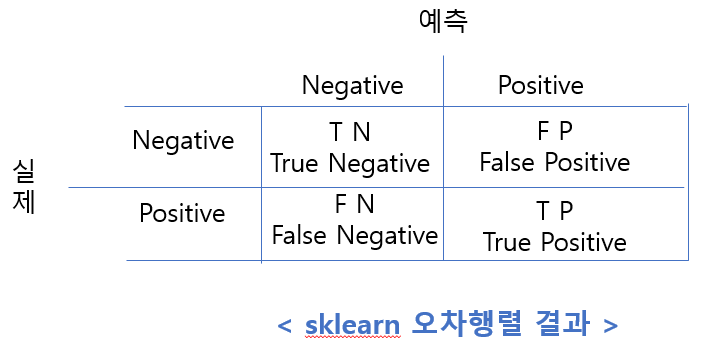

3. 정밀도(Precision)와 재현율(Recall)

  정밀도와 재현율은 **positive 데이터 예측에 집중**한 성능평가지표이다.

  1) 정밀도 = 양성 예측도 = precision
- 정의: Positive로 예측한 것 중, 실제로도 Positive인 것의 비율
- 특징: Positive 예측성능을 더욱 정밀하게 측정하기 위한 평가지표, 실제 Negative인 데이터를 positive로 잘못 예측했을 때 큰 영향이 발생하는 경우 활용. (ex: 스팸메일이 아닌데, 스팸으로 분류해버리는 경우)
- 수식: 진짜 양성/양성 예측 = TP / (TP+FP)
- 코드:

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

  2) 재현율 = 민감도 = recall = sensitivity = TPR
- 정의: 실제 Positive 중(TP+FN), Positive로 예측한 것(TP)의 비율
- 특징: 실제 Positive인 데이터를 Negative로 잘못 예측했을 때 큰 영향이 발생하는 경우 활용 가능. (ex: 암, 채무불이행)
- 수식: 양성 예측/진짜 양성 중에 = TP / (TP+FN)
- 코드:

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

  3) 정밀도와 재현율의 trade-off

  분류 결정 임계값(Threshold)을 조정함으로써 정밀도 or 재현율의 수치를 조절할 수 있다. 하지만 이 둘은 상충관계이므로, 한쪽을 높이면 다른 하나가 떨어진다. 따라서 두 평가지표 수치가 적절한 조화 이루도록 평가해야 한다.

4. F1 스코어

- 정의: 실제 Positive 중 Positive로 예측한 것들의 비율
- 특징: 정밀도와 재현율을 결합한 것으로, 둘의 조화 평균
- 수식: F1 = 2 / {(1/recall) + (1/precision)} = 2 * (precision*recall)/(precision+recall)
- 코드:

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

5. ROC 곡선과 AUC

  1) ROC 곡선

- 정의: FPR이 변할 때(x축) TPR이 변하는 것(y축)을 나타내는 곡선
- 특징: 우상향 그래프
- 수식: FPR = FP/(FP+TN) = 1-TNP = 1-specificity
- 코드:

In [ ]:
from sklearn.metrics import roc_curve
# FPR, TPR, 임계값 할당
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# ROC curve 그리기
import matplotlib.pyplot as plt
plt.plot(fpr, tpf)

  2) AUC 스코어

- 정의: ROC 곡선 아래 면적, 1에 가까울수록 예측 성능 우수
- 특징: AUC값이 커지려면 FPR이 작을 때 TPR 값이 커야함.
- 코드:

In [ ]:
from sklearn.metrics import roc_curve, auc
# FPR, TPR, 임계값 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# AUC
auc = auc(fpr, tpr) # (x, y)

# Section 4. 회귀분석

## 1.데이터 확인

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/CodingTest/data_science/빅데이터분석기사/data/실기2/boston_housing.csv')

In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   crim    506 non-null    float64
 1   zn      506 non-null    float64
 2   indus   506 non-null    float64
 3   chas    506 non-null    int64  
 4   nox     506 non-null    float64
 5   rm      506 non-null    float64
 6   age     506 non-null    float64
 7   dis     506 non-null    float64
 8   rad     506 non-null    int64  
 9   tax     506 non-null    int64  
 10  pratio  506 non-null    float64
 11  b       506 non-null    float64
 12  lstat   506 non-null    float64
 13  medv    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
# 결측치 파악
df.isna().sum()

crim      0
zn        0
indus     0
chas      0
nox       0
rm        0
age       0
dis       0
rad       0
tax       0
pratio    0
b         0
lstat     0
medv      0
dtype: int64

범주형인 chas 변수를 제외한 변수들과 주택가격(medv) 사이의 선형관계 파악 위해 산점도와 선형 회귀직선을 시각화 해보자.

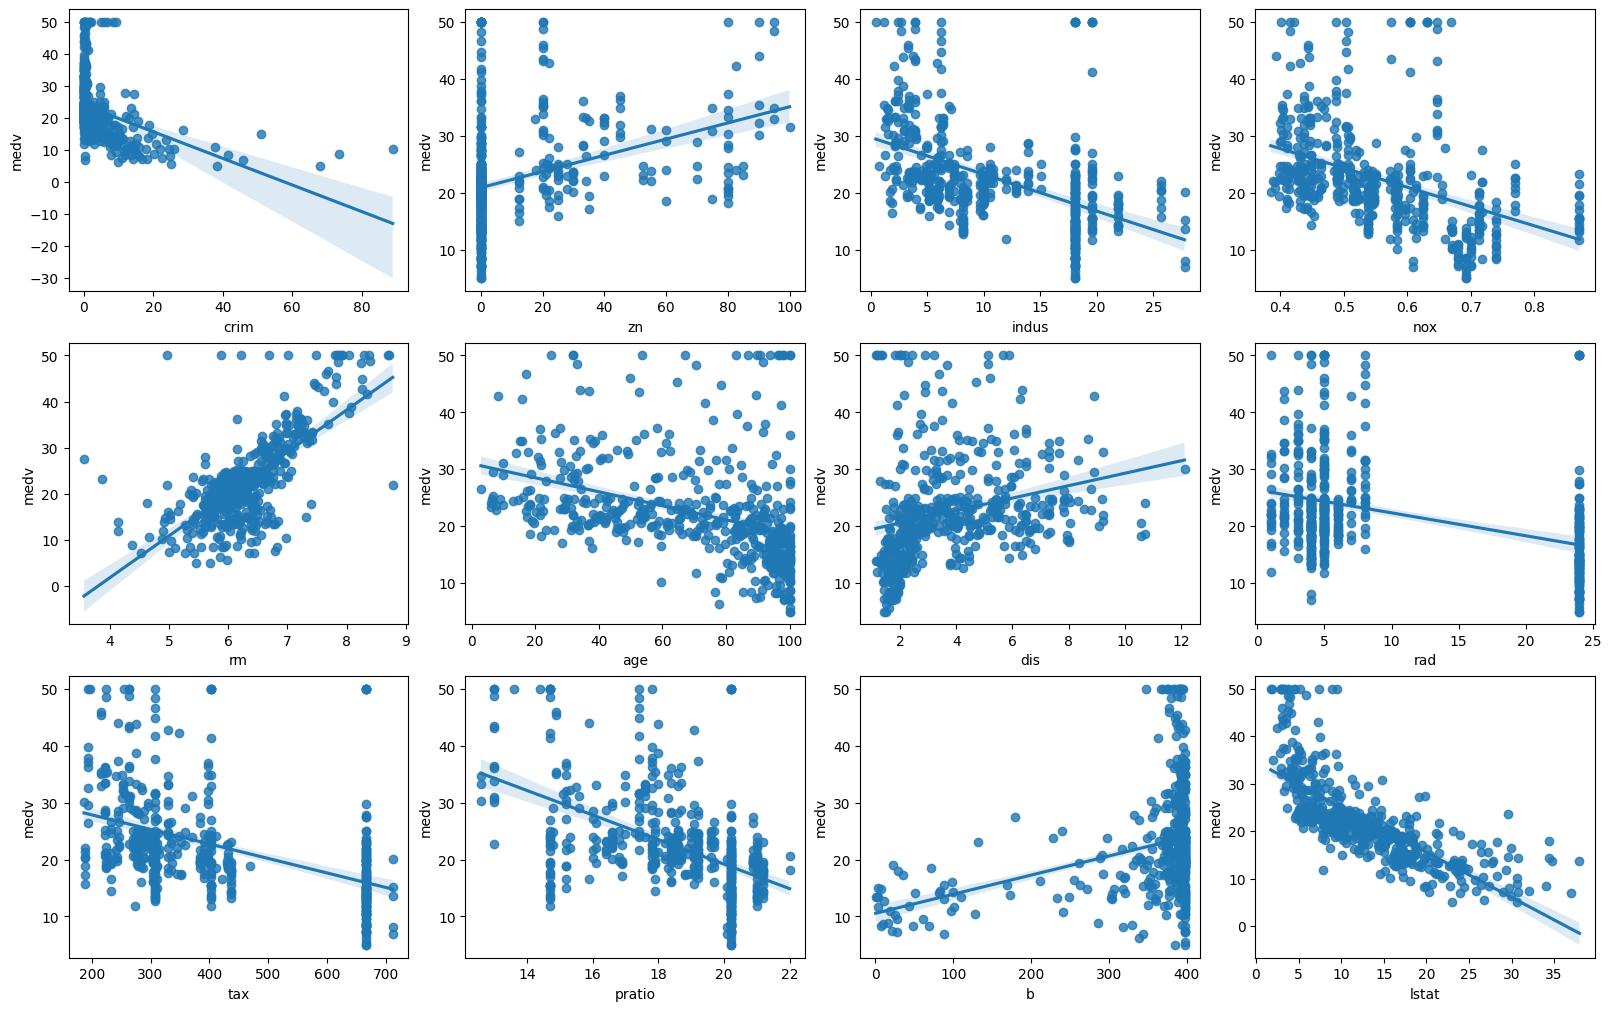

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot
fig, axs = plt.subplots(figsize = (16, 10), ncols = 4, nrows = 3, constrained_layout = True)
features = df.drop(['medv', 'chas'], axis = 1) # target과 범주형 변수 제외

for i, x in zip(range(12), features) :
    row = int(i/4) # 행번호 설정
    col = i % 4 # 열번호 설정
    # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화함
    sns.regplot(x = x, y = df['medv'], data = df, ax = axs[row][col])

12개의 변수는 주택 가격과 양 or 음의 선형관계임

## 2.데이터 분할

In [45]:
from sklearn.model_selection import train_test_split
x = df.drop(['medv'], axis = 1)
y = df[['medv']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 56)

In [48]:
# target변수의 평균을 확인하여 데이터가 잘 분할되었는지 임의로 확인함
print('train set의 집가격 평균', y_train.mean())
print('test set의 집가격 평균', y_test.mean())

train set의 집가격 평균 medv    22.309406
dtype: float64
test set의 집가격 평균 medv    23.417647
dtype: float64
